# Set Up ELK-Bigquery Container on Measurement Node

## Overview

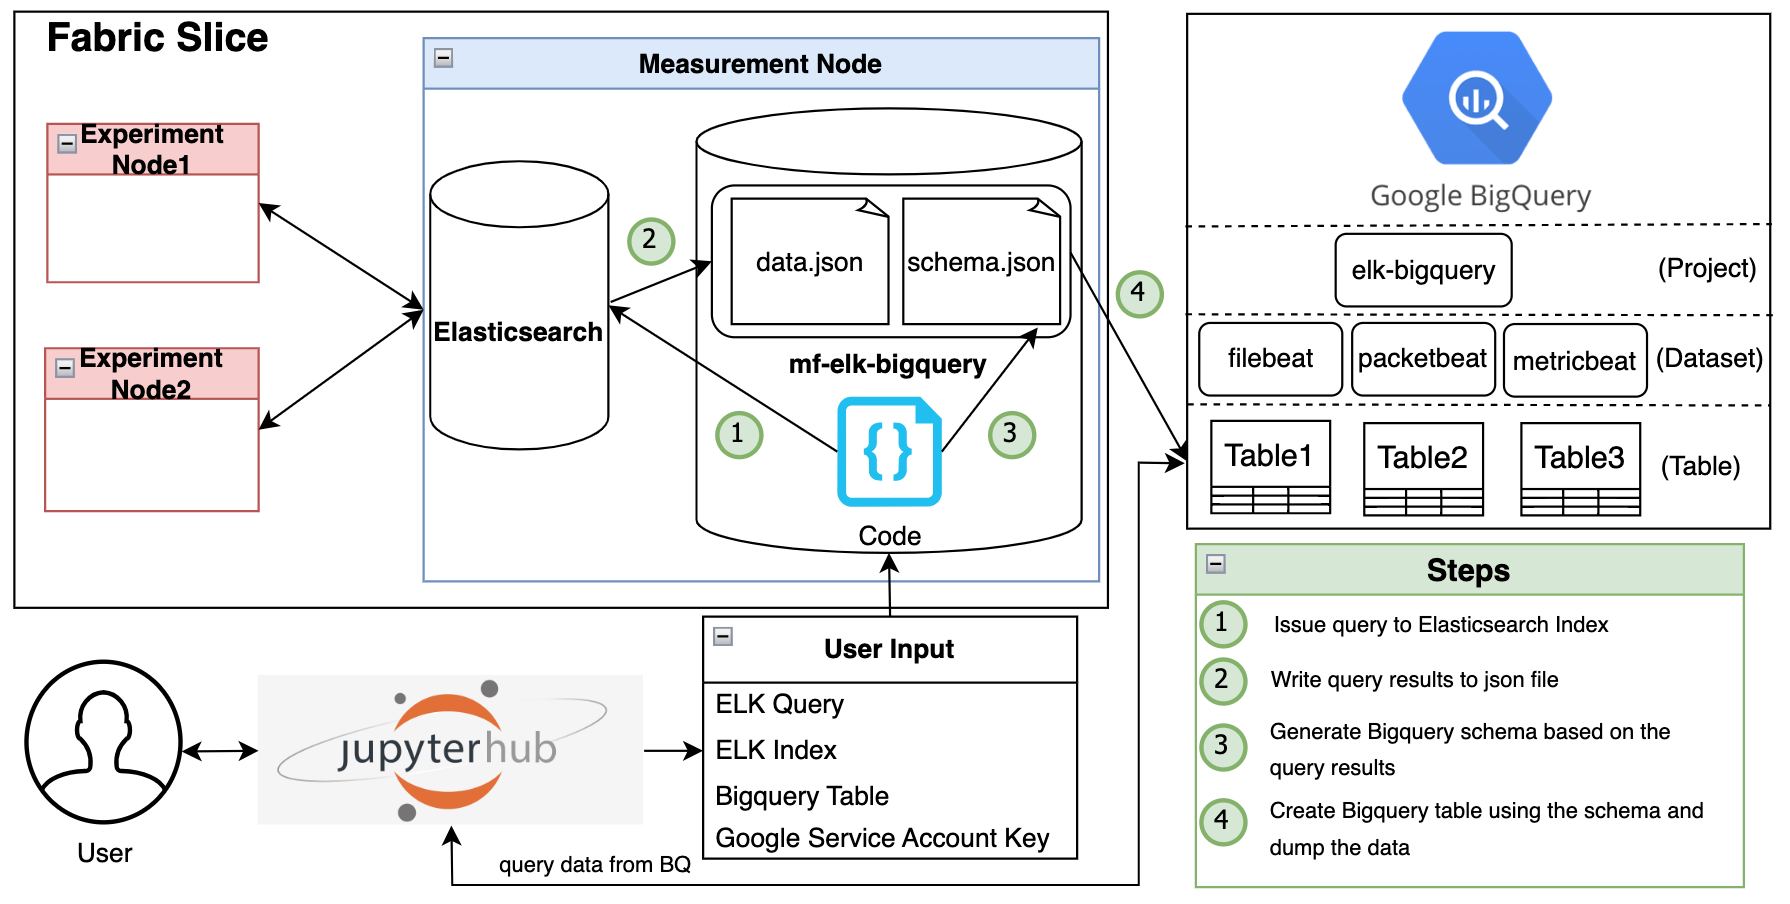

## Import

## Slice Info

In [ ]:
# Import libraries
%run ../../../setup/include/include_libraries.py
# load general variables
%run ../../../slice_info/selected_slice.py

In [ ]:
%%time
mf = MFLib(selected_slice)

## Find Measurement Node

In [ ]:
meas_node_name = mf.measurement_node_name
try:
    slice = fablib.get_slice(name=selected_slice)
except Exception as e:
    print(f"Fail: {e}")
print (slice)   

try:
    meas_node = slice.get_node(name=meas_node_name)
except Exception as e:
    print(f"Fail: {e}")   
print (meas_node)

## Set Up Bigquery Account and Key

### Create Your Google Cloud Project and Enable Bigquery API
https://cloud.google.com/resource-manager/docs/creating-managing-projects <br>
https://cloud.google.com/bigquery/docs/enable-transfer-service#enable-api

### Set Up the Google Service Account for the Google Project 
https://cloud.google.com/iam/docs/service-accounts-create

### Add a Service Account Key and Download it
https://cloud.google.com/iam/docs/keys-create-delete

### Download the Google Service Account Key for Your Google CLoud Project. Drag the Key from Your Machine to Jupyterhub and place it in the /google_service_account_key/ folder as key.json

### Set up billing for the project
https://cloud.google.com/billing/docs/how-to/modify-project

### Create Bigquery Dataset

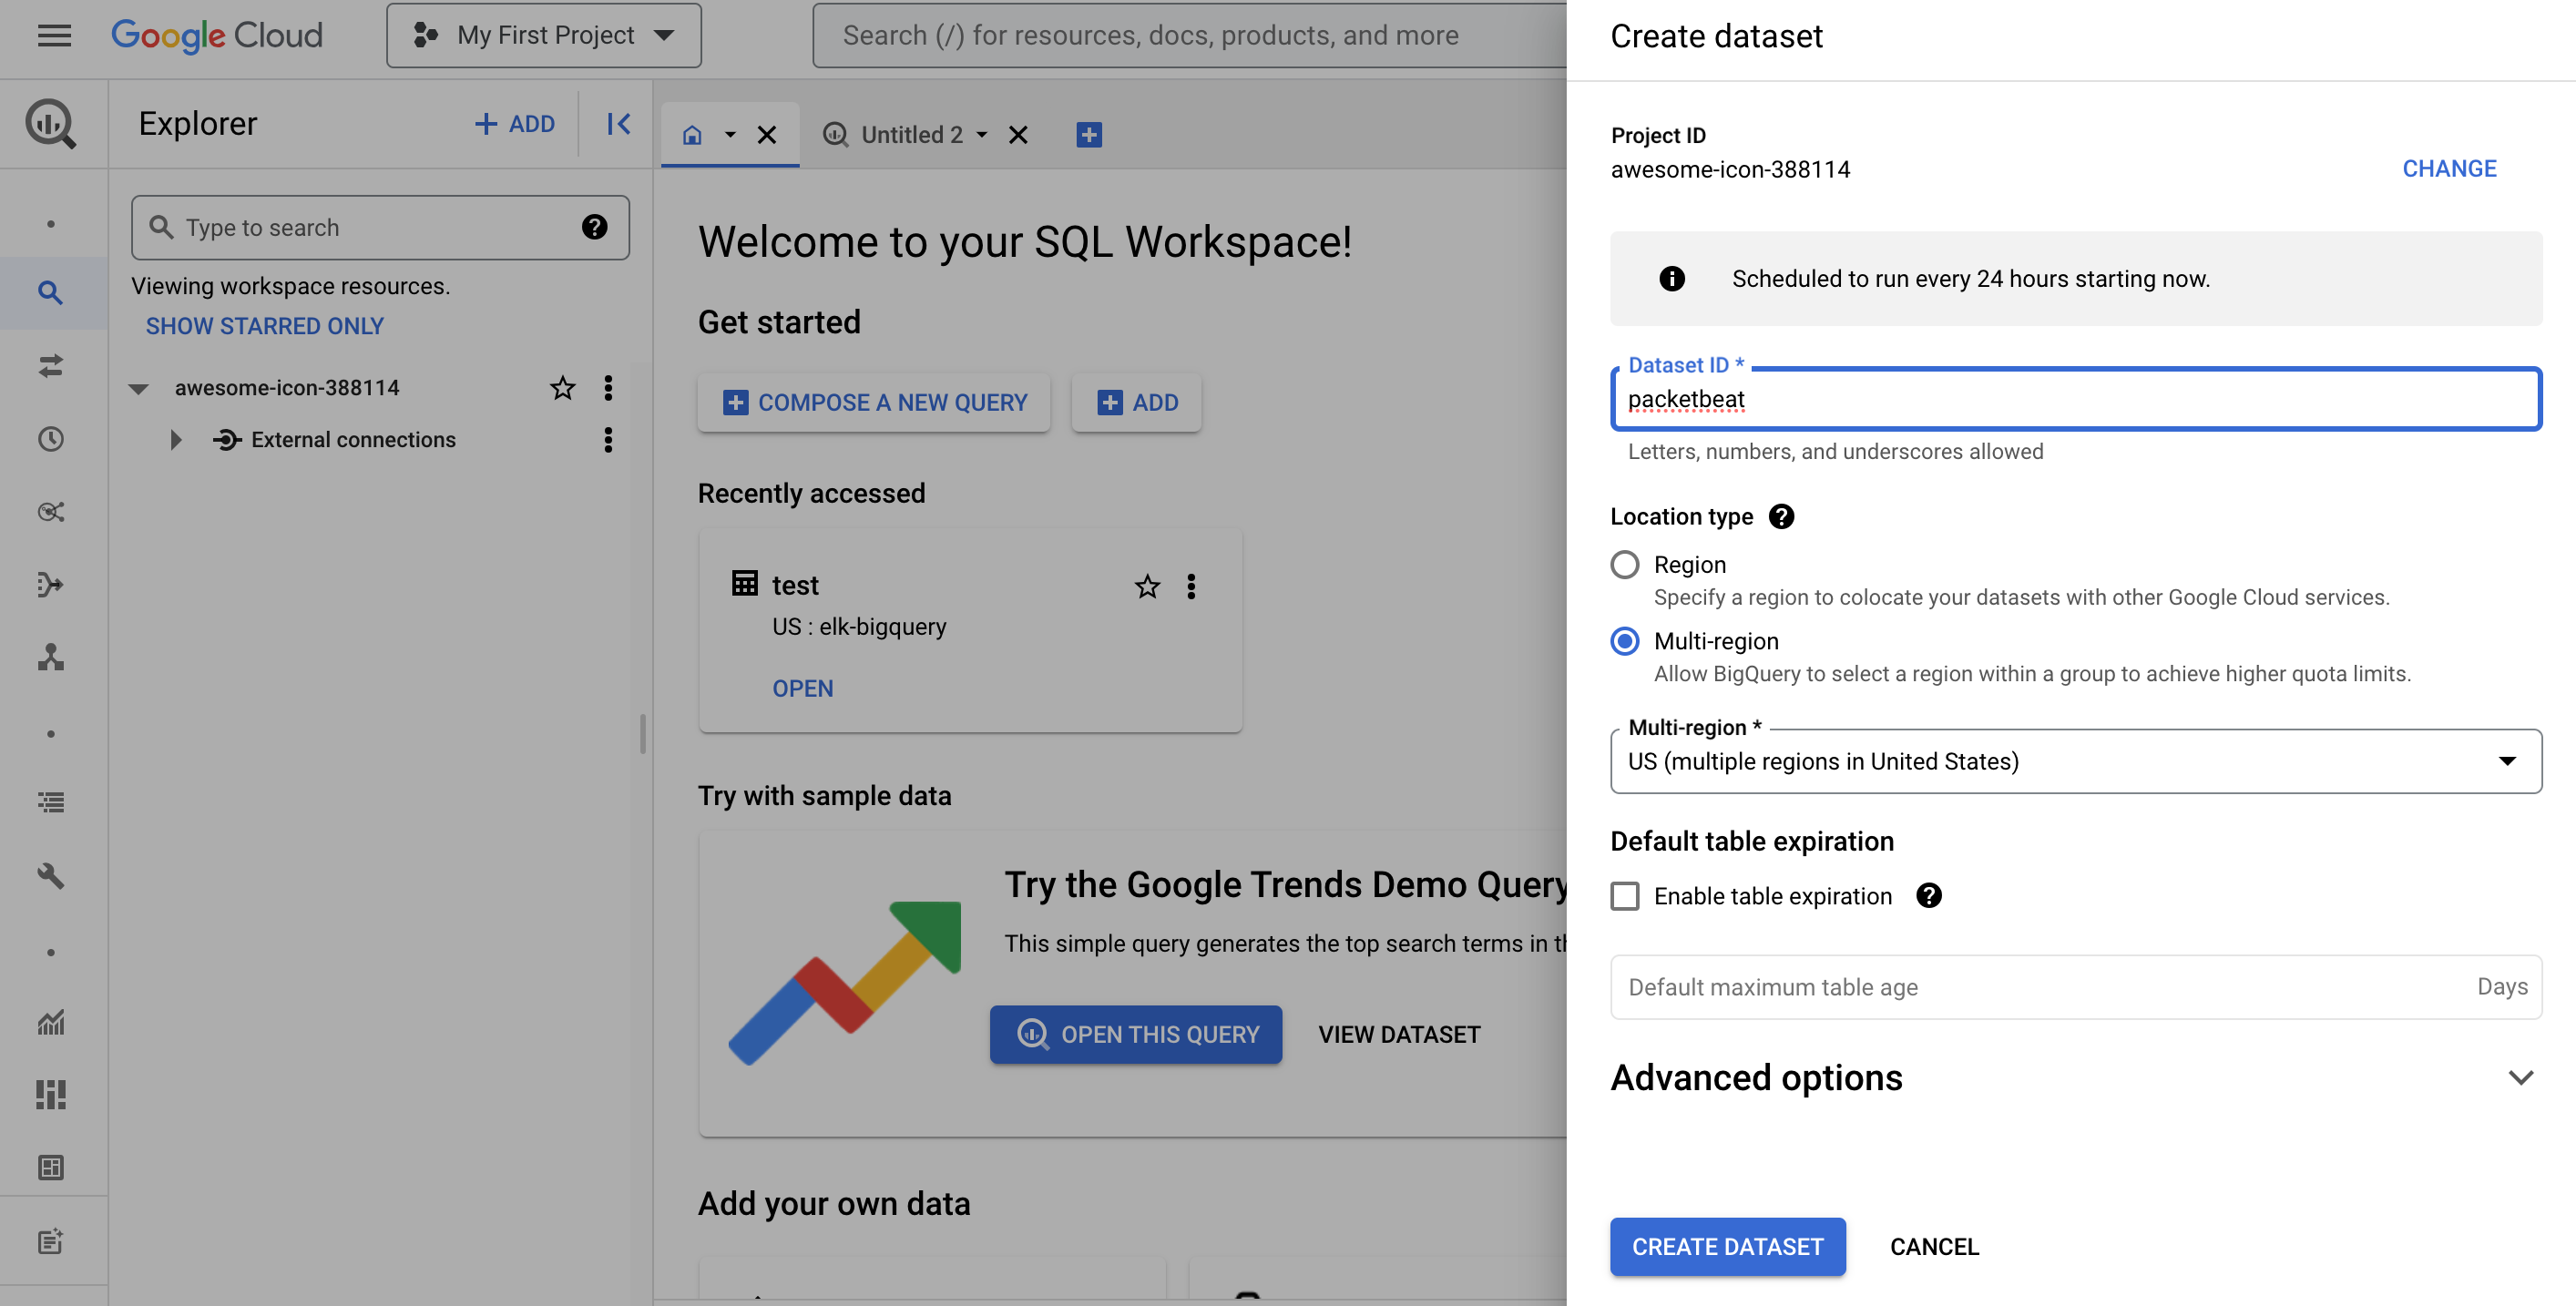

## Upload the Google Service Account Key to Measurement Node

### Create a new directory

In [ ]:
dir_name= 'elk_bigquery'
meas_node.execute(f"mkdir {dir_name}", quiet=True)

### Upload the Key

In [ ]:
# Specify the path of your Google Service Account Key on Jupyter Hub
cwd = os.getcwd()
key_file_relative_path = "google_service_account_key/key.json"
key_path = os.path.join(cwd, key_file_relative_path)
# Upload Google Service Account Key
remote_key_path=f"/home/ubuntu/{dir_name}/key.json"
meas_node.upload_file(local_file_path=key_path, remote_file_path=remote_key_path)

## Pull the elk-bigquery docker image

In [ ]:
meas_node.execute('sudo docker pull fabrictestbed/mf-elk-bigquery:0.1.0')

## Run the Docker Image as a Docker Container and bind mount the key

In [ ]:
container_name = 'elk-bigquery'
command = f'''
          sudo docker run --name={container_name} --network=host --privileged \
          -v {remote_key_path}:/root/elk-bigquery/key.json \
          -dit fabrictestbed/mf-elk-bigquery:0.1.0
           '''
meas_node.execute(command)

In [ ]:
meas_node.execute(f"sudo docker ps | grep {container_name}")